In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

In [3]:
# 样本生成模块
from sklearn.datasets.samples_generator import make_classification

# 随机生成分类数据

In [4]:
X,labels=make_classification(n_samples=800,n_features=2,n_redundant=0,n_informative=2,
                             random_state=2,n_clusters_per_class=2)

In [5]:
labels.shape

(800,)

In [6]:
X.shape

(800, 2)

# 数据做成dataframe

In [9]:
data_df=pd.DataFrame()
data_df['x1']=X[:,0]
data_df['x2']=X[:,1]
data_df['y']=labels

In [10]:
data_df.head()

,x1,x2,y
0,1.063051,-1.021122,1
1,-0.655795,1.021788,0
2,0.666927,0.974413,1
3,-0.534940,1.236946,0
4,0.810504,0.998536,1


# 1. 查看数据分布

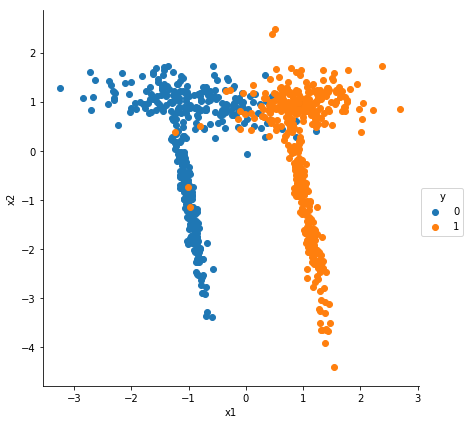

In [56]:
sns.FacetGrid(data_df, hue="y",size=6).map(plt.scatter, 'x1', 'x2').add_legend()
plt.show()

# 2.划分测试训练集

In [11]:
# 导入测试集训练集模块
from sklearn.model_selection import train_test_split  

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_df.iloc[:,0:2],data_df.iloc[:,2:], test_size = 0.3)  
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 2)
(240, 2)
(560, 1)
(240, 1)


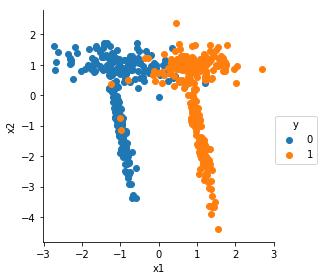

In [13]:
sns.FacetGrid(pd.concat([x_train,y_train],axis=1), hue="y",size=4).map(plt.scatter, 'x1', 'x2').add_legend()
plt.show()

In [14]:
def plot_traintest(x_train, x_test, y_train, y_test):
    plt.figure(figsize=(8,6))
    neg_train=y_train==0
    pos_train=y_train==1
    neg_test=y_test==0
    pos_test=y_test==1
    plt.scatter(x_train[neg_train['y']].ix[:,0].values,x_train[neg_train['y']].ix[:,1].values,c='r')
    plt.scatter(x_train[pos_train['y']].ix[:,0].values,x_train[pos_train['y']].ix[:,1].values,c='b')
    plt.scatter(x_test[neg_test['y']].ix[:,0].values,x_test[neg_test['y']].ix[:,1].values,c='m',marker='+')
    plt.scatter(x_test[pos_test['y']].ix[:,0].values,x_test[pos_test['y']].ix[:,1].values,c='y',marker='^')
    plt.show()

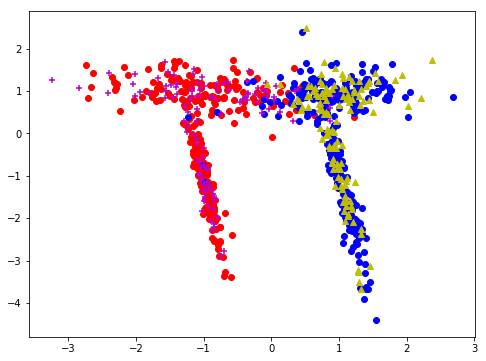

In [15]:
plot_traintest(x_train, x_test, y_train, y_test)

In [20]:
# LR 预测
from sklearn.linear_model.logistic import  LogisticRegression  
LR = LogisticRegression()
LR.fit(x_train,y_train) ### theta
predictions_LR = LR.predict(x_test)  
prob_LR=LR.predict_proba(x_test)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
predictions_LR

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [22]:
prob_LR

array([[  9.70148943e-03,   9.90298511e-01],
       [  9.97271738e-01,   2.72826172e-03],
       [  9.97004289e-01,   2.99571081e-03],
       [  9.98950567e-01,   1.04943343e-03],
       [  3.27426627e-04,   9.99672573e-01],
       [  9.99498685e-01,   5.01315234e-04],
       [  2.39198343e-02,   9.76080166e-01],
       [  3.92498255e-02,   9.60750174e-01],
       [  7.51052090e-02,   9.24894791e-01],
       [  1.09584142e-02,   9.89041586e-01],
       [  9.98238931e-01,   1.76106865e-03],
       [  2.49293857e-02,   9.75070614e-01],
       [  1.22894108e-02,   9.87710589e-01],
       [  2.04696074e-02,   9.79530393e-01],
       [  4.33334336e-02,   9.56666566e-01],
       [  8.16976876e-01,   1.83023124e-01],
       [  1.99151149e-02,   9.80084885e-01],
       [  5.38670433e-02,   9.46132957e-01],
       [  4.89795386e-02,   9.51020461e-01],
       [  9.59609098e-03,   9.90403909e-01],
       [  1.23620927e-02,   9.87637907e-01],
       [  9.81286644e-01,   1.87133558e-02],
       [  

In [64]:
predictions_LR

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [65]:
prob_LR

array([[  1.03164078e-02,   9.89683592e-01],
       [  6.84153679e-01,   3.15846321e-01],
       [  9.63229582e-01,   3.67704184e-02],
       [  2.82486897e-01,   7.17513103e-01],
       [  5.92038415e-02,   9.40796158e-01],
       [  9.85185220e-01,   1.48147804e-02],
       [  6.65263099e-02,   9.33473690e-01],
       [  9.76443829e-01,   2.35561712e-02],
       [  1.86207805e-02,   9.81379220e-01],
       [  6.07424855e-02,   9.39257515e-01],
       [  9.87298923e-01,   1.27010769e-02],
       [  7.57282879e-02,   9.24271712e-01],
       [  1.92037341e-02,   9.80796266e-01],
       [  5.35224576e-01,   4.64775424e-01],
       [  2.46194265e-02,   9.75380573e-01],
       [  9.67639306e-01,   3.23606940e-02],
       [  7.92492561e-01,   2.07507439e-01],
       [  9.97377298e-01,   2.62270217e-03],
       [  9.82466277e-01,   1.75337232e-02],
       [  9.92050954e-01,   7.94904636e-03],
       [  9.92167479e-01,   7.83252149e-03],
       [  9.92876605e-03,   9.90071234e-01],
       [  

In [23]:
# KNN 预测
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predictions_KNN = KNN.predict(x_test)  
prob_KNN=KNN.predict_proba(x_test)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [24]:
KNN?

In [25]:
# 评估曲线
from sklearn.metrics import roc_curve, auc  
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, prob_LR[:, 1])  
roc_auc_LR = auc(fpr_LR, tpr_LR) 
print(roc_auc_LR)
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, prob_KNN[:, 1])  
roc_auc_KNN = auc(fpr_KNN, tpr_KNN) 
print(roc_auc_KNN)

0.989571746385
0.978830645161


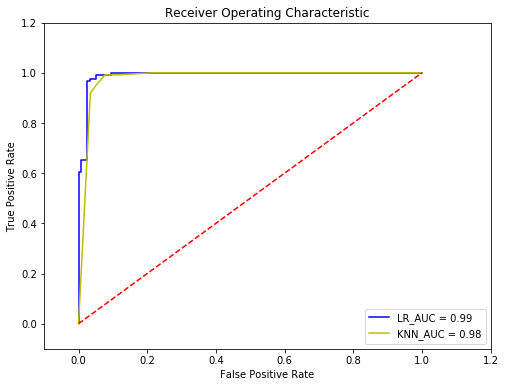

In [26]:
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')  
plt.plot(fpr_LR, tpr_LR, 'b',  label='LR_AUC = %0.2f'% roc_auc_LR) 
plt.plot(fpr_KNN, tpr_KNN, 'y',  label='KNN_AUC = %0.2f'% roc_auc_KNN) 
plt.legend(loc='lower right')  
plt.plot([0,1],[0,1],'r--')  
plt.xlim([-0.1,1.2])  
plt.ylim([-0.1,1.2])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show() 

# 步骤
# 1. 数据清洗：缺失值、异常值
# 2. 数据归一化，标准化
# 3. 构造特征
# 4. 划分训练测试
# 5. 训练---调参
# 6. 模型评估

In [35]:
x1=np.array([1,2,3])
x2=np.array([4,5,6])

In [36]:
x3=x1*x2.T

In [20]:
arange(0.0,4.0,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9])

In [38]:
np.array(x_train)

array([[ 0.32994132,  1.17982526],
       [-0.78906143, -2.63136666],
       [ 0.86019074,  0.9477931 ],
       ..., 
       [ 1.15158684, -2.26999776],
       [ 1.13519015,  0.84038931],
       [-0.96333476, -1.72941035]])

In [34]:
y_train

,y
780,1
351,0
720,1
392,0
718,0
743,0
329,0
701,1
257,1
135,1
